In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split,cross_val_score,KFold
import matplotlib.pyplot as plt
import os 

chose_data = 'full_data.csv'
#chose_data = 'significant_data_05.csv'


C:\Users\THINKPAD\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv(chose_data)
total_data =  len(data.index)
print('the number of sample:',total_data)

the number of sample: 180495


In [4]:
x_train,x_test,y_train,y_test = train_test_split(data.drop('Late_delivery_risk', axis = 1).values,data['Late_delivery_risk'].values,test_size = 0.5)

RandomFores

In [5]:
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.01, n_estimators=100,
                       verbose=0, warm_start=True)
model = rf.fit(x_train, y_train)

mức độ quan trọng của feature: [1.52083822e-02 3.12216210e-04 3.56866810e-04 1.95596550e-03
 1.56232403e-03 2.46788165e-04 5.48334648e-04 1.73099637e-04
 3.29499388e-04 2.39008056e-04 4.13863961e-04 2.92722751e-04
 2.50228621e-04 2.88138498e-04 4.51850560e-04 5.63212063e-03
 2.80252088e-03 5.79608234e-01 1.28855010e-04 3.80435340e-01
 8.76364081e-03]
feature quan trọng nhất: time_delta


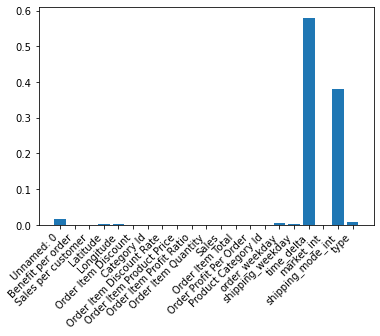

In [27]:
# biểu thị mức độ quan trọng của feature, cao nhất ứng vs quan trọng nhất 
print('mức độ quan trọng của feature:', rf.feature_importances_)
plt.bar(list(data.drop('Late_delivery_risk', axis = 1).keys()),rf.feature_importances_)
# Xoay trục x
plt.xticks(rotation=45, ha='right')
print('feature quan trọng nhất:', list(data.drop('Late_delivery_risk', axis = 1).keys())[np.argmax(rf.feature_importances_)])

In [8]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[35685  5091]
 [  501 48971]]
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     40776
           1       0.91      0.99      0.95     49472

    accuracy                           0.94     90248
   macro avg       0.95      0.93      0.94     90248
weighted avg       0.94      0.94      0.94     90248

0.932510102444022


<Figure size 432x288 with 0 Axes>

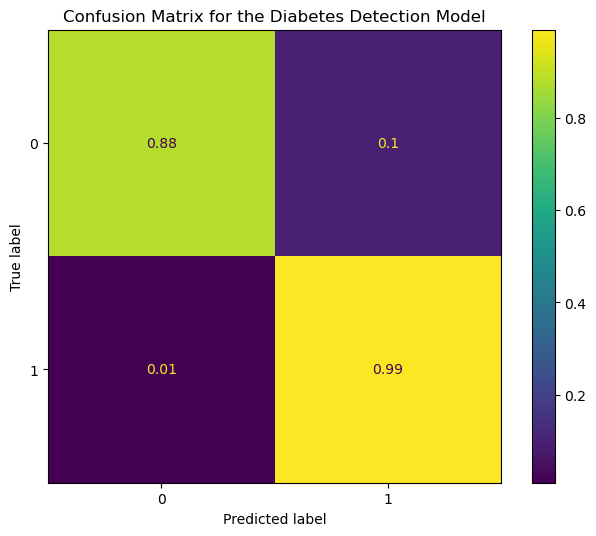

In [12]:
import numpy as np
#cm = np.asarray(cm)
cm = cm/cm.sum(axis=1)
for i in range(len(cm)):
    for j in range(len(cm)):
        cm[i][j] = round(cm[i][j],2)
        
plt.figure()
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=model.classes_)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Diabetes Detection Model')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax)
fig.savefig('t.png')


In [19]:
from sklearn import preprocessing

x_train  = preprocessing.normalize(x_train)
x_test  = preprocessing.normalize(x_test)

In [20]:
xgb = XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints=None,
              n_estimators=140, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=27, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)
model = xgb.fit(x_train,y_train)

In [21]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[38345  2474]
 [ 1273 48156]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     40819
           1       0.95      0.97      0.96     49429

    accuracy                           0.96     90248
   macro avg       0.96      0.96      0.96     90248
weighted avg       0.96      0.96      0.96     90248

0.9568184289664526


mức độ quan trọng của feature: [0.00860189 0.00572497 0.00772291 0.04921249 0.07560392 0.00541088
 0.02666689 0.0073913  0.017043   0.00651774 0.03512923 0.00861088
 0.00637436 0.00424634 0.03601867 0.02870863 0.01359256 0.24353038
 0.0156639  0.3457106  0.05251844]
feature quan trọng nhất: shipping_mode_int


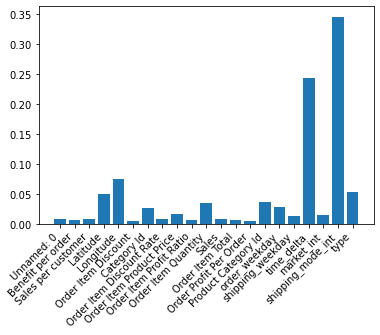

In [26]:
# biểu thị mức độ quan trọng của feature, cao nhất ứng vs quan trọng nhất 

print('mức độ quan trọng của feature:', xgb.feature_importances_)
plt.bar(list(data.drop('Late_delivery_risk', axis = 1).keys()),xgb.feature_importances_)
# Xoay trục x
plt.xticks(rotation=45, ha='right')
print('feature quan trọng nhất:', list(data.drop('Late_delivery_risk', axis = 1).keys())[np.argmax(xgb.feature_importances_)])

*logistic regression


In [30]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(random_state=0)
lg.fit(x_train, y_train)
#clf.predict(X[:2, :])

#clf.predict_proba(X[:2, :])

y_pred = lg.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
#model.score(x_train, y_train)


[[  261 40558]
 [  184 49245]]
              precision    recall  f1-score   support

           0       0.59      0.01      0.01     40819
           1       0.55      1.00      0.71     49429

    accuracy                           0.55     90248
   macro avg       0.57      0.50      0.36     90248
weighted avg       0.57      0.55      0.39     90248

0.5013357850555944


<AxesSubplot:title={'center':'Feature Importance'}>

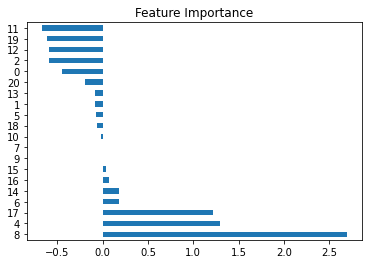

In [32]:
# biểu thị mức độ quan trọng của feature, cao nhất ứng vs quan trọng nhất 

importance = lg.coef_[0]
#importance is a list so you can plot it. 
feat_importances = pd.Series(importance)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

*SVM

In [33]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model = clf.fit(x_train, y_train)
#clf.predict(X[:2, :])

#clf.predict_proba(X[:2, :])

y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
model.score(x_test, y_test)


[[38311  2508]
 [ 2295 47134]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     40819
           1       0.95      0.95      0.95     49429

    accuracy                           0.95     90248
   macro avg       0.95      0.95      0.95     90248
weighted avg       0.95      0.95      0.95     90248

0.9460638955927625


0.9467799840439677

KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=3)  # Specify the number of neighbors (K)

# Train the classifier
knn.fit(x_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(x_test)

from sklearn.metrics import accuracy_score
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5587270632036166


In [ ]:
print(classification_report(y_test,y_pred))

Linear Discriminant Analysis (LDA)

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your data in X (features) and y (labels)
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an LDA classifier object
lda = LinearDiscriminantAnalysis()

# Fit the LDA model on the training data
lda.fit(x_train, y_train)

# Make predictions on the test set
y_pred = lda.predict(x_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
#model.score(x_train, y_train)

Accuracy: 0.5839242974913571
[[38311  2508]
 [ 2295 47134]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     40819
           1       0.95      0.95      0.95     49429

    accuracy                           0.95     90248
   macro avg       0.95      0.95      0.95     90248
weighted avg       0.95      0.95      0.95     90248

0.9460638955927625
